In [2]:
# Import packages and use shorthand (data, plt, pd)

import pandas as pd                   # data analysis library
import matplotlib.pyplot as plt       # data visualization library
import seaborn as sns                 # enhanced data visualization library
import numpy as np                    # numerical computational library
import datetime as dt                 # date & time manipulation library
import random
from matplotlib import style
import pandas_datareader.data as web
import datetime as dt

from pandas_datareader import data    # remote data access for Pandas
from random import choice  # randomly select an item from a list of items
from random import shuffle


In [1]:
# Downloading packages
import sys                  # To install packages from your Jupyter Notebook

!{sys.executable} -m pip install datetime
!{sys.executable} -m pip install pandas_datareader
%pip install package_name

Note: you may need to restart the kernel to use updated packages.


In [58]:
%pip install package_name

Note: you may need to restart the kernel to use updated packages.


In [14]:
def MR_get(tickers, start_date, end_date):
    adj_close = data.DataReader(tickers, 
                                data_source = 'yahoo', 
                                start       = start_date, 
                                end         = end_date)['Adj Close']
    
    return adj_close

## Monte Carlo Simulations

### Portfolio Formation

In [45]:
# Stock Tickers & Weights

# Stock tickers
tickers = ['ADBE', 'CRM', 'CSCO', 'NVDA', 'V', 'INTU', 'TXN', 'VZ', 'SBUX', 'UPS', 'MA', 'KO', 'PG', 'TAN', 'ICLN', 'HD', 'WMT', 'UNH', 'TMO', 'LIN', 'PYPL', 'DIS', 'CMCSA', 'NFLX','PEP']

# Need some weights for where we have our money
weights = pd.Series(index = tickers, dtype = float)   # list to hold our weights
#weights[tickers] = [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]                  # specific weights per ticker
weights[tickers] = 1/len(tickers)                     # equal weights per ticker

# Check our list of stock tickers & weights
weights

ADBE     0.04
CRM      0.04
CSCO     0.04
NVDA     0.04
V        0.04
INTU     0.04
TXN      0.04
VZ       0.04
SBUX     0.04
UPS      0.04
MA       0.04
KO       0.04
PG       0.04
TAN      0.04
ICLN     0.04
HD       0.04
WMT      0.04
UNH      0.04
TMO      0.04
LIN      0.04
PYPL     0.04
DIS      0.04
CMCSA    0.04
NFLX     0.04
PEP      0.04
dtype: float64

In [32]:
# Quick recap on indexing
#weights[0]
#weights['ADBE']

#weights[1]
#weights['CRM']

#weights[2]
#weights['CSCO']

0.04

In [46]:
# Lookback Period, Returns, Mu, & Sigma

# Lookback period
start_date = '2015-01-01'           # start day for lookback
end_date   = '2020-12-31'           # end day for lookback                            
#end_date   = dt.datetime.today()   # automatically get today's date

# Pull Adj Close data
adj_close = MR_get(tickers, start_date, end_date)

# Compute Returns from the Adj Close
returns = adj_close[tickers].pct_change()
    
# Remove the NA from returns; we always get 1 fewer returns than data
returns = returns.dropna()

# Calculate mu (Expected Returns) and sigma (Volatility) of stocks
mu    = returns.mean() 
sigma = returns.std()  

In [17]:
# Check Portfolio
returns

Symbols,ADBE,CRM,CSCO,NVDA,V,INTU,TXN,VZ,SBUX,UPS,...,HD,WMT,UNH,TMO,LIN,PYPL,DIS,CMCSA,NFLX,PEP
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-07,0.001118,0.015905,0.005143,-0.018840,-0.005138,0.016287,-0.003503,0.004464,0.001289,0.008690,...,0.009702,0.017372,-0.011952,0.004295,0.005430,-0.002452,0.012100,0.006440,-0.005075,0.021186
2015-07-08,-0.007445,-0.012383,-0.013523,-0.007074,-0.015346,0.000968,-0.032806,-0.002570,-0.018205,-0.020616,...,-0.012456,-0.009893,-0.015907,-0.021001,-0.020337,-0.052430,-0.016311,-0.013118,-0.006210,-0.008195
2015-07-09,0.006001,0.008214,-0.002964,-0.012214,0.004796,0.001450,-0.028669,-0.006870,0.012362,0.002723,...,0.003423,-0.003832,0.004715,-0.002964,-0.000775,-0.005764,0.003559,0.005187,0.023742,-0.010668
2015-07-10,0.001491,0.016867,0.013750,0.017517,0.020432,0.007530,0.018707,0.015997,0.009621,0.012637,...,0.015443,0.004671,0.023547,0.021984,0.011810,0.005507,0.007267,0.019029,0.015684,0.010149
2015-07-13,0.010547,-0.001265,0.018695,0.006582,0.016077,0.010253,0.006530,0.004255,0.020707,0.008251,...,0.015915,0.010394,0.002456,0.028018,0.009372,0.060248,0.013827,0.008388,0.039686,0.017478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.005937,-0.007255,0.003605,-0.001191,0.016561,0.011249,0.004100,-0.002035,-0.000490,-0.002607,...,0.004114,0.001955,0.009479,-0.000545,0.005958,-0.003341,0.001037,0.006795,-0.000991,0.004501
2020-12-28,-0.001820,-0.005049,0.008532,-0.007215,0.018831,-0.000105,-0.001052,0.002379,0.022841,-0.004820,...,-0.006164,0.011986,0.015141,0.005763,0.013249,-0.012194,0.029529,0.014490,0.010020,0.012753
2020-12-29,0.006333,-0.009704,-0.006233,0.003353,0.008183,-0.007321,-0.001796,-0.002882,0.012363,-0.013597,...,-0.011365,-0.006335,0.004047,0.004623,-0.002307,-0.019938,-0.008722,0.008609,0.022634,0.003471


In [124]:
# Check Expected Returns (𝜇)
mu

Symbols
ADBE     0.001520
CRM      0.001074
CSCO     0.000628
NVDA     0.002805
V        0.001004
INTU     0.001162
TXN      0.001115
VZ       0.000410
SBUX     0.000707
UPS      0.000653
MA       0.001149
KO       0.000446
PG       0.000599
TAN      0.001057
ICLN     0.000919
HD       0.000847
WMT      0.000689
UNH      0.000985
TMO      0.001057
LIN      0.000786
PYPL     0.001571
DIS      0.000522
CMCSA    0.000579
NFLX     0.001612
PEP      0.000526
dtype: float64

In [19]:
# Check Volatility (𝜎)
sigma

Symbols
ADBE     0.020011
CRM      0.021483
CSCO     0.017086
NVDA     0.029456
V        0.016386
INTU     0.018626
TXN      0.018425
VZ       0.011923
SBUX     0.016966
UPS      0.015958
MA       0.018120
KO       0.012363
PG       0.012553
TAN      0.021811
ICLN     0.015925
HD       0.015829
WMT      0.014123
UNH      0.017856
TMO      0.015733
LIN      0.015321
PYPL     0.021566
DIS      0.017458
CMCSA    0.015973
NFLX     0.026593
PEP      0.012844
dtype: float64

In [48]:
# Initialize Monte Carlo parameters
monte_carlo_runs = 1000
days_to_simulate = 5
loss_cutoff      = 0.95            # count any losses larger than 5% (or -5%)

### 1) Parametric Simulation

In [21]:
# Parametric

compound_returns  = sigma.copy()
total_simulations = 0
bad_simulations   = 0

for run_counter in range(0,monte_carlo_runs):   # Loop over runs    
    for i in tickers:                      # loop over tickers, below is done once per ticker
        
        # Loop over simulated days:
        compounded_temp = 1
        
        for simulated_day_counter in range(0,days_to_simulate): # loop over days
            
            # Draw from 𝑁~(𝜇,𝜎)
            ######################################################
            simulated_return = np.random.normal(mu[i],sigma[i],1)
            ######################################################
            
            compounded_temp = compounded_temp * (simulated_return + 1)        
        
        compound_returns[i] = compounded_temp     # store compounded returns
    
    # Now see if those returns are bad by combining with weights
    portfolio_return = compound_returns.dot(weights) # dot product
    
    if(portfolio_return < loss_cutoff):
        bad_simulations = bad_simulations + 1
    
    total_simulations = total_simulations + 1

print("Your portfolio will lose", round((1-loss_cutoff)*100,3), "%",
      "over", days_to_simulate, "days", 
      bad_simulations/total_simulations, "of the time.")

Your portfolio will lose 5.0 % over 5 days 0.0 of the time.


### 2) Bootstrap Simulation

In [22]:
# Bootstrap

compound_returns  = sigma.copy()
total_simulations = 0
bad_simulations   = 0

for run_counter in range(0,monte_carlo_runs):   # Loop over runs    
    for i in tickers:                           # loop over tickers, below is done once per ticker
        
        # Loop over simulated days:
        compounded_temp = 1
        
        for simulated_day_counter in range(0,days_to_simulate): # loop over days
            
            # Draw from historical returns
            ####################################
            simulated_return = choice(returns[i])
            ####################################
            
            compounded_temp = compounded_temp * (simulated_return + 1)        
        
        compound_returns[i] = compounded_temp     # store compounded returns
    
    # Now see if those returns are bad by combining with weights
    portfolio_return = compound_returns.dot(weights) # dot product
    
    if(portfolio_return < loss_cutoff):
        bad_simulations = bad_simulations + 1
    
    total_simulations = total_simulations + 1

print("Your portfolio will lose", round((1-loss_cutoff)*100,3), "%",
      "over", days_to_simulate, "days", 
      bad_simulations/total_simulations, "of the time.")

Your portfolio will lose 5.0 % over 5 days 0.0 of the time.


# Create Monte Carlo Plot for one stock


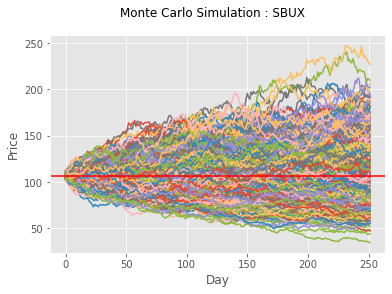

In [146]:
style.use('ggplot')

start = dt.datetime(2015, 1, 1)
end = dt.datetime(2020, 12, 31)

prices = web.DataReader('SBUX', 'yahoo', start, end)['Close']
returns = prices.pct_change()

last_price = prices[-1]

num_simulations = 1000
num_days = 252


simulation_df = pd.DataFrame()
for x in range (num_simulations):
    count = 0
    daily_vol = returns.std()
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    
    
    for y in range (num_days):
        if count == 251:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
        
    simulation_df[x] = price_series

        
fig=plt.figure()
fig.suptitle('Monte Carlo Simulation : SBUX')
plt.plot(simulation_df)
plt.axhline(y = last_price, color= 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()  

## Graphic VaR

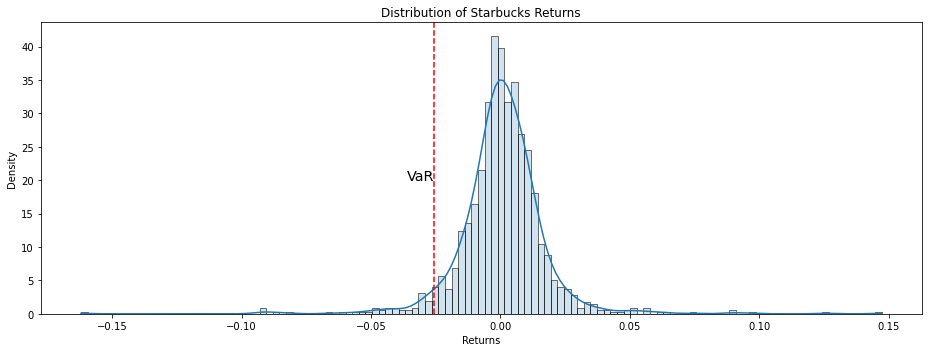

In [41]:
# Plot Returns + VaR for Starbucks

# setting figure size
fig, ax = plt.subplots(figsize = (13, 5))

# histogram for returns
sns.histplot(data  = returns['SBUX'],  # data set - index Perrigo
             bins  = 'fd',          # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,          # kernel density plot (line graph)
             alpha = 0.2,           # transparency of colors
             stat  = 'density')     # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label = "Distribution of Starbucks Returns")


# this adds an x-label
plt.xlabel(xlabel = 'Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# instantiate VaR with 95% confidence level
VaR_95 = np.percentile(returns, 5)


# this adds a line to signify VaR
plt.axvline(x         = VaR_95,         # x-axis location
            color     = 'r',            # line color
            linestyle = '--')           # line style


# this adds a label to the line
plt.text(VaR_95,                         # x-axis location
         20,                             # y-axis location
         'VaR',                          # text
         horizontalalignment = 'right',  # alignment ('center' | 'left')
         fontsize = 'x-large')           # fontsize


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

# Graphic VaR for Portfolio

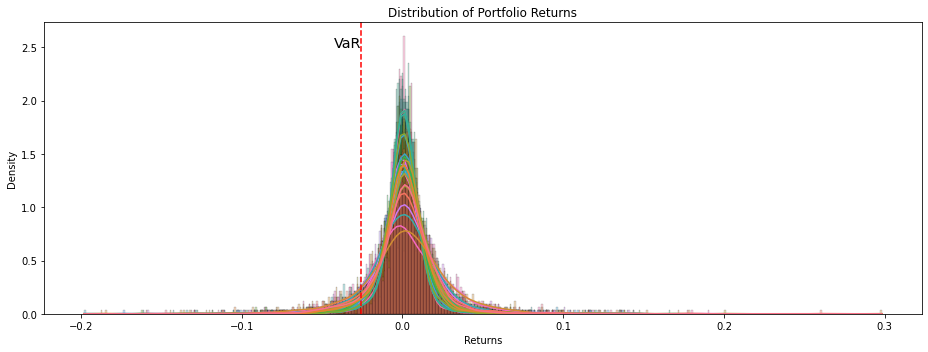

In [38]:
# Plot Returns

# setting figure size
fig, ax = plt.subplots(figsize = (13, 5))


# histogram for returns
sns.histplot(data  = returns,      # data set - index Facebook (or AAPL or GOOG)
             bins  = 'fd',         # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,         # kernel density plot (line graph)
             alpha = 0.3,          # transparency of colors
             stat  = 'density')    # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label = "Distribution of Portfolio Returns")


# this adds an x-label
plt.xlabel(xlabel = 'Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# instantiate VaR with 95% confidence level
VaR_95 = np.percentile(returns, 5)


# this adds a line to signify VaR
plt.axvline(x         = VaR_95,         # x-axis location
            color     = 'r',            # line color
            linestyle = '--')           # line style


# this adds a label to the line
plt.text(VaR_95,                         # x-axis location
         2.5,                             # y-axis location
         'VaR',                          # text
         horizontalalignment = 'right',  # alignment ('center' | 'left')
         fontsize = 'x-large')           # fontsize

# remove legend
ax.get_legend().remove()


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

# Back testing

In [150]:
pip install bt

     |████████████████████████████████| 256 kB 1.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [151]:
import bt

In [201]:
beginning='2010-01-01'
e = '2015-01-01'

In [189]:
# We will need the risk-free rate to get correct Sharpe Ratios 
riskfree =  bt.get('^IRX', start=start_date)
# Take the average of the risk free rate over entire time period
riskfree_rate = float(riskfree.mean()) / 100
# Print out the risk free rate to make sure it looks good
print(riskfree_rate)

0.009072683233498347


In [ ]:
s_mark = bt.Strategy('Portfolio', 
                       [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

In [191]:
#s_mark = bt.Strategy('Portfolio', 
                     #  [bt.algos.RunEveryNPeriods(9, 3),
                    #   bt.algos.SelectAll(),
                    #   bt.algos.WeighMeanVar(),
                    #   bt.algos.Rebalance()])

In [ ]:
b_mark = bt.Backtest(s_mark, data_bt)

In [ ]:
# Fetch some data
data_sp500 = bt.get('spy,agg', start=beginning, end= s)


In [ ]:
# Recreate the strategy named First_Strat
b_sp500 = bt.Strategy('SP500', [bt.algos.RunMonthly(),
                                     bt.algos.SelectAll(),
                                     bt.algos.WeighEqually(),
                                     bt.algos.Rebalance()])

In [195]:
# Create a backtest named test
sp500_test = bt.Backtest(b_sp500, data_sp500)

In [196]:
#run the backtest
result = bt.run(b_mark, sp500_test)

/Users/jennyhallstrom/opt/anaconda3/lib/python3.8/site-packages/ffn/core.py:2163: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
/Users/jennyhallstrom/opt/anaconda3/lib/python3.8/site-packages/ffn/core.py:2163: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


In [173]:
#create the run only for the b_mark
result_1 = bt.run(b_mark)

/Users/jennyhallstrom/opt/anaconda3/lib/python3.8/site-packages/ffn/core.py:2163: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


/Users/jennyhallstrom/opt/anaconda3/lib/python3.8/site-packages/ffn/core.py:2163: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


<AxesSubplot:title={'center':'Equity Progression'}>

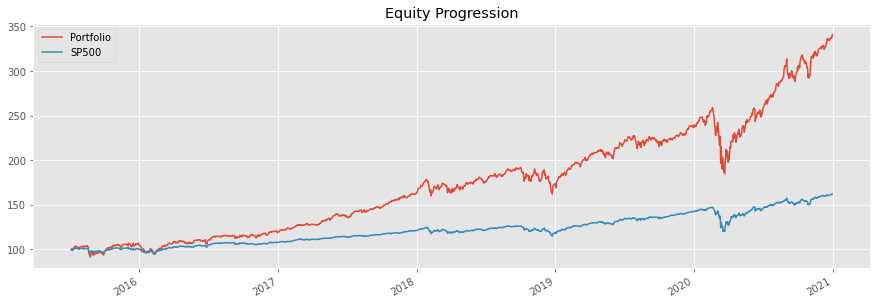

In [174]:
#result = bt.run(b_mark, b_inv, b_random, b_best, b_sp500)
result.set_riskfree_rate(riskfree_rate)
result.plot()

In [167]:
#show histogram
#result_1.plot_histogram()

In [168]:
# Show some performance metrics
result.display()

Stat                 Portfolio    SP500
-------------------  -----------  ----------
Start                2015-07-06   2015-07-06
End                  2020-12-31   2020-12-31
Risk-free rate       0.91%        0.91%

Total Return         240.56%      36.42%
Daily Sharpe         1.19         0.32
Daily Sortino        1.85         0.51
CAGR                 25.01%       5.82%
Max Drawdown         -28.64%      -34.36%
Calmar Ratio         0.87         0.17

MTD                  4.72%        4.92%
3m                   12.56%       21.57%
6m                   33.52%       25.96%
YTD                  43.56%       9.96%
1Y                   43.56%       9.96%
3Y (ann.)            27.63%       14.09%
5Y (ann.)            26.53%       5.90%
10Y (ann.)           -            -
Since Incep. (ann.)  25.01%       5.82%

Daily Sharpe         1.19         0.32
Daily Sortino        1.85         0.51
Daily Mean (ann.)    24.24%       8.25%
Daily Vol (ann.)     19.54%       22.73%
Daily Skew           -0.

## Fundamentals

In [112]:
# New Packages!

##############################################################################
# Downloading packages
#import sys                  # To install packages from your Jupyter Notebook


# Use this to install a dependancy for our yahoo finance package
#!{sys.executable} -m pip install requests_html
#!{sys.executable} -m pip install yahoo_fin

##############################################################################
# Import packages
import yahoo_fin as yf                   # data scraping library
import yahoo_fin.stock_info as si        # module from library for stock_info

     |████████████████████████████████| 87 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 1.7 MB/s eta 0:00:01
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24581 sha256=d80b695aa1f048827a940851eaaaf6d75713cf3e9e980438fdbe41c43afa4a6d
  Stored in directory: /Users/jennyhallstrom/Library/Caches/pip/wheels/e5/33/1f/68392720485b3ecf125a69e700baaab7624616deedea2fa6e2
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13486 sha256=3c9669b099ae33844a4f2394f9b20fb416be09e19c3939d5582d1f88bd392097
  Stored in directory: /Users/jennyhallstrom/Library/Caches/pip/wheels/a0/b8/b7/8c942b2c5be5158b874a88195116b05ad124bac795f6665e65
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=5225fd504ef06ce3d05761c4c40f473eafc327df84bdde9c21f4ade6171ce226
  Stored in directory: /Users/jennyhallstrom/Library/Caches/pip/wheels/75/78/21/68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully b

# HAVE NOT DONE FURTHER

### Single Ticker

In [42]:
# Scrape the table found on the quote page of an input ticker from Yahoo Finance 
quote_table = si.get_quote_table('SBUX', dict_result = False)

quote_table

NameError: name 'si' is not defined

In [116]:
# Get PE Ratio
quote_table.iloc[13, 1]

186.37

In [24]:
# Get Dividends
quote_table.iloc[10, 1]

'0.82 (0.62%)'

In [117]:
# Scrape Valuation Measures data from statistics page for input ticker
stats_table = si.get_stats_valuation('SBUX')

# Set row index to be the measure for text-based referencing
stats_table.set_index('Unnamed: 0', inplace=True)

stats_table

# Subsetting data for specific values
#stats_table.loc['Enterprise Value 3', 'As of Date: 1/30/2021Current']
#stats_table.iloc[1,0]

,As of Date: 2/10/2021Current,12/31/2020,9/30/2020,6/30/2020,3/31/2020,12/31/2019
Unnamed: 0,,,,,,
Market Cap (intraday) 5,125.05B,125.94B,100.81B,86.02B,76.79B,103.26B
Enterprise Value 3,144.73B,146.56B,122.34B,106.31B,94.31B,111.67B
Trailing P/E,186.35,135.42,76.71,26.28,21.55,30.11
Forward P/E 1,36.63,37.04,31.45,26.81,23.47,28.90
PEG Ratio (5 yr expected) 1,1.62,1.64,2.93,2.63,2.24,2.53
Price/Sales (ttm),5.41,5.38,4.24,3.31,2.97,4.09
Price/Book (mrq),NaN,NaN,NaN,NaN,NaN,NaN
Enterprise Value/Revenue 3,6.25,21.72,19.72,25.18,15.73,15.73
Enterprise Value/EBITDA 6,51.37,111.25,129.25,-338.47,108.77,69.58


### Multiple Tickers

In [119]:
# Generate list of tickers listed on the Dow Jones
dow_list = si.tickers_dow() 
    # you can also use tickers_nasdaq() or tickers_sp500()

    
# Instantiate dictionary to hold our scraped data    
dow_stats = {}

# Loop through each ticker from the list of tickers
for ticker in dow_list:
    temp = si.get_stats_valuation(ticker)    # scrape valuation measures data
    temp = temp.iloc[:,:2]                   # subset for attribute name & recent values
    temp.columns = ["Attribute", "Recent"]   # rename columns
    dow_stats[ticker] = temp                 # populate prior dictionary

# Check output
dow_stats

{'AAPL':                      Attribute Recent
 0      Market Cap (intraday) 5  2.27T
 1           Enterprise Value 3  2.31T
 2                 Trailing P/E  36.49
 3                Forward P/E 1  31.65
 4  PEG Ratio (5 yr expected) 1   3.00
 5            Price/Sales (ttm)   7.99
 6             Price/Book (mrq)  34.32
 7   Enterprise Value/Revenue 3   7.85
 8    Enterprise Value/EBITDA 6  26.12,
 'AMGN':                      Attribute   Recent
 0      Market Cap (intraday) 5  137.73B
 1           Enterprise Value 3  160.07B
 2                 Trailing P/E    19.37
 3                Forward P/E 1    14.08
 4  PEG Ratio (5 yr expected) 1     1.61
 5            Price/Sales (ttm)     5.53
 6             Price/Book (mrq)    14.64
 7   Enterprise Value/Revenue 3     6.30
 8    Enterprise Value/EBITDA 6    12.32,
 'AXP':                      Attribute   Recent
 0      Market Cap (intraday) 5  102.00B
 1           Enterprise Value 3      NaN
 2                 Trailing P/E    33.60
 3         

In [35]:
# Combine all the valutation measures into a single DataFrame
combined_stats = pd.concat(dow_stats)               # combine
combined_stats = combined_stats.reset_index()       # reset index into integers
combined_stats                                      # check output

,level_0,level_1,Attribute,Recent
0,AAPL,0,Market Cap (intraday) 5,2.22T
1,AAPL,1,Enterprise Value 3,2.25T
2,AAPL,2,Trailing P/E,35.57
3,AAPL,3,Forward P/E 1,31.65
4,AAPL,4,PEG Ratio (5 yr expected) 1,3.08
...,...,...,...,...
265,WMT,4,PEG Ratio (5 yr expected) 1,3.98
266,WMT,5,Price/Sales (ttm),0.76
267,WMT,6,Price/Book (mrq),5.08
268,WMT,7,Enterprise Value/Revenue 3,0.85


In [36]:
# Clean up the combined_stats DataFrame

# Remove unnecessary column
del combined_stats["level_1"]

# Update column names
combined_stats.columns = ["Ticker", "Attribute", "Recent"]
combined_stats

,Ticker,Attribute,Recent
0,AAPL,Market Cap (intraday) 5,2.22T
1,AAPL,Enterprise Value 3,2.25T
2,AAPL,Trailing P/E,35.57
3,AAPL,Forward P/E 1,31.65
4,AAPL,PEG Ratio (5 yr expected) 1,3.08
...,...,...,...
265,WMT,PEG Ratio (5 yr expected) 1,3.98
266,WMT,Price/Sales (ttm),0.76
267,WMT,Price/Book (mrq),5.08
268,WMT,Enterprise Value/Revenue 3,0.85


### Comparing Attributes

In [37]:
# P/E Ratio Comparison

# Create filter
pe_ratio_filter = combined_stats["Attribute"] == "Trailing P/E"

# Subset data using filter
pe_ratios = combined_stats[pe_ratio_filter].reset_index()

# Check output
pe_ratios

,index,Ticker,Attribute,Recent
0,2,AAPL,Trailing P/E,35.57
1,11,AMGN,Trailing P/E,19.45
2,20,AXP,Trailing P/E,30.84
3,29,BA,Trailing P/E,NaN
4,38,CAT,Trailing P/E,30.27
5,47,CRM,Trailing P/E,59.20
6,56,CSCO,Trailing P/E,18.05
7,65,CVX,Trailing P/E,43.77
8,74,DIS,Trailing P/E,51.22
9,83,DOW,Trailing P/E,31.65


In [38]:
# Sort by Descending Order
pe_ratios_sorted = pe_ratios.sort_values('Recent', ascending = False)

# Remove unnecessary column
del pe_ratios_sorted["index"]

pe_ratios_sorted

,Ticker,Attribute,Recent
22,NKE,Trailing P/E,78.73
28,WBA,Trailing P/E,78.40
5,CRM,Trailing P/E,59.20
8,DIS,Trailing P/E,51.22
7,CVX,Trailing P/E,43.77
26,V,Trailing P/E,39.52
0,AAPL,Trailing P/E,35.57
21,MSFT,Trailing P/E,34.57
18,MCD,Trailing P/E,32.94
9,DOW,Trailing P/E,31.65


### Balance Sheet Data (Single Ticker)

In [44]:
# Get Apple's yearly balance sheet data
apple_bs = si.get_balance_sheet('AAPL', yearly = True)
                 # If you set yearly = False, you will get quarterly data

# Check data
apple_bs

endDate,2020-09-26,2019-09-28,2018-09-29,2017-09-30
Breakdown,,,,
totalLiab,258549000000,248028000000,258578000000,241272000000
totalStockholderEquity,65339000000,90488000000,107147000000,134047000000
otherCurrentLiab,47867000000,43242000000,39293000000,38099000000
totalAssets,323888000000,338516000000,365725000000,375319000000
commonStock,50779000000,45174000000,40201000000,35867000000
otherCurrentAssets,11264000000,12352000000,12087000000,13936000000
retainedEarnings,14966000000,45898000000,70400000000,98330000000
otherLiab,46108000000,50503000000,48914000000,43251000000
treasuryStock,-406000000,-584000000,-3454000000,-150000000


In [48]:
# Subset Apple BS to show Cash over time
apple_cash = apple_bs.loc['cash', :]

# Sort by highest cash
apple_cash.sort_values(ascending = False)

endDate
2019-09-28    48844000000
2020-09-26    38016000000
2018-09-29    25913000000
2017-09-30    20289000000
Name: cash, dtype: int64

### Balance Sheet Data (Multiple Tickers)

In [49]:
# Generate list of tickers listed on the Dow Jones
dow_list = si.tickers_dow() 
    # you can also use tickers_nasdaq() or tickers_sp500()

    
# Instantiate dictionary to hold our scraped data    
dow_stats = {}

# Loop through each ticker from the list of tickers
for ticker in dow_list:
    temp = si.get_balance_sheet(ticker)     # scrape valuation measures data
    temp = temp.iloc[:,0]                   # subset for attribute name & recent values
    temp.columns = ["2020"]                 # rename columns
    dow_stats[ticker] = temp                # populate prior dictionary

# Check output
#dow_stats

      Breakdown             
AAPL  totalLiab                 2.585490e+11
      totalStockholderEquity    6.533900e+10
      otherCurrentLiab          4.786700e+10
      totalAssets               3.238880e+11
      commonStock               5.077900e+10
                                    ...     
WMT   netReceivables            6.284000e+09
      longTermDebt              4.441000e+10
      inventory                 4.443500e+10
      accountsPayable           4.697300e+10
      otherCurrentAssets                 NaN
Length: 787, dtype: float64

In [50]:
# Combine all the balance sheet data into a single DataFrame
combined_stats = pd.concat(dow_stats)               # combine
combined_stats = combined_stats.reset_index()       # reset index into integers
combined_stats                                      # check output

,level_0,Breakdown,0
0,AAPL,totalLiab,2.585490e+11
1,AAPL,totalStockholderEquity,6.533900e+10
2,AAPL,otherCurrentLiab,4.786700e+10
3,AAPL,totalAssets,3.238880e+11
4,AAPL,commonStock,5.077900e+10
...,...,...,...
782,WMT,netReceivables,6.284000e+09
783,WMT,longTermDebt,4.441000e+10
784,WMT,inventory,4.443500e+10
785,WMT,accountsPayable,4.697300e+10


In [52]:
# Rename columns
combined_stats.columns = ["Ticker", "BS Element", "Value (2020)"]

# Check data
combined_stats

,Ticker,BS Element,Value (2020)
0,AAPL,totalLiab,2.585490e+11
1,AAPL,totalStockholderEquity,6.533900e+10
2,AAPL,otherCurrentLiab,4.786700e+10
3,AAPL,totalAssets,3.238880e+11
4,AAPL,commonStock,5.077900e+10
...,...,...,...
782,WMT,netReceivables,6.284000e+09
783,WMT,longTermDebt,4.441000e+10
784,WMT,inventory,4.443500e+10
785,WMT,accountsPayable,4.697300e+10
